[1] "H3K27me3" "H3K4me3"  "H3K27ac"  "ATAC"

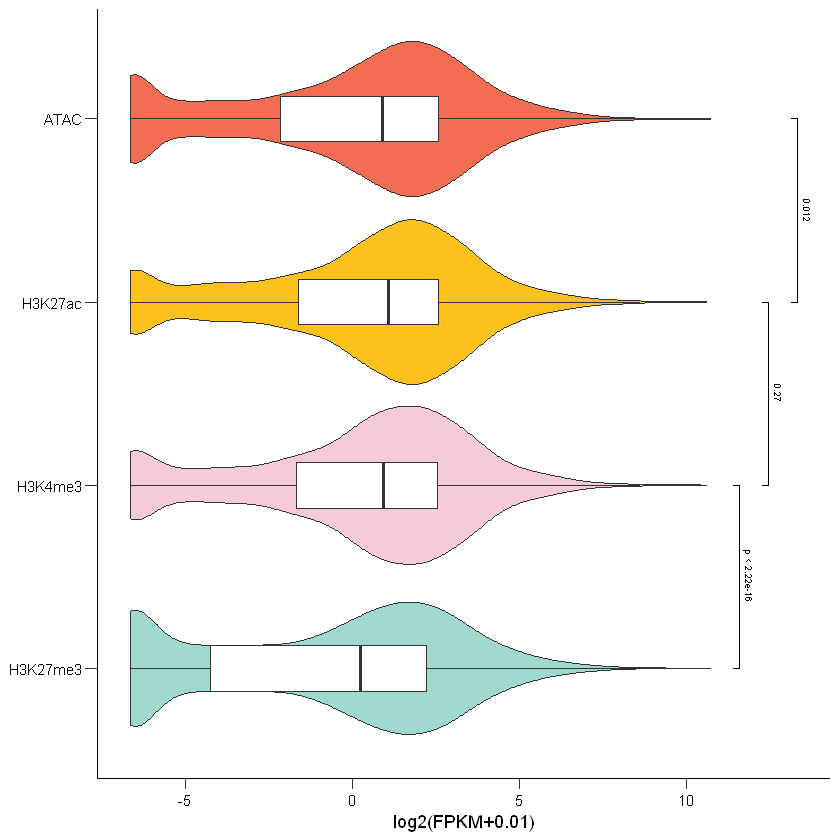

In [10]:
## 分析不同的CREs修饰对于基因表达的影响
rm(list = ls())
setwd('G:/TM-1_leaf_3D-genome/HiC/loop/loop_3k/CREs')
library(ggplot2)
library(ggpubr)
compaired <- list(c("H3K27me3", "H3K4me3"), c("H3K4me3", "H3K27ac"), c("H3K27ac", "ATAC"))
df <- read.csv('CRE_regulated_gene_fpkm.txt', sep = '\t', header = T)
#df <- within(df, tags <- factor(tags, levels = c("atac_active", "atac_inactive", "active", "inactive")))
df <- within(df, tags <- factor(tags, levels = c("H3K27me3", "H3K4me3", "H3K27ac", "ATAC")))
with(df, levels(tags))
#df
fg <- ggplot(df, aes(x=log2(FPKM+0.01), y=tags, fill=tags))+
geom_violin()+
geom_boxplot(outlier.colour = NA, notch=FALSE, width=0.25, fill='white')+
labs(x='log2(FPKM+0.01)', y=NULL)+
#facet_grid(Bias~.)+
#coord_cartesian(xlim = c(0, 10)) +
theme(panel.background = element_blank(), 
     panel.grid = element_blank(),
     axis.line=element_line(linetype=1,color="black"),
     legend.position='none',
     axis.ticks.length = unit(0.25, 'cm'),
     axis.text = element_text(color='black'),
     #axis.text.x = element_text(angle = 315, hjust = 0)
     )+
geom_signif(comparisons = compaired, step_increase = 0.05,test =wilcox.test, tip_length=0.01, textsize = 2)+
#scale_fill_manual(values=c('#F36D52','#FCC11D','#F5CBD9', "#9FD9CD"))+
scale_fill_manual(values=c("#9FD9CD", '#F5CBD9', '#FCC11D', '#F36D52'))
fg
ggsave(plot =fg, filename = 'CRE_regulated_gene_fpkm.pdf', height =2, width = 3)